In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
! git clone https://github.com/sridharsakkari/customer_churn.git

Cloning into 'customer_churn'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


# Problem Statement:
It is very critical and important for banks or any other financial organization to have an idea about their customers. When unpredicted number of customers exited (churned) from the system, it might impact on the prospects of institution. Therefore it is always a prime motive for any institution to retain their customers. 

The goal of this project is to analyse the behaviour of customers on various attributes that might lead them to exit and make a more constructive decision making models to reduce the churn rate as the costs incurr in attracting new customers is way higher than retaining existing ones.




In [3]:
# import the data 

raw_data = pd.read_csv('/content/customer_churn/Churn_Modelling.csv',delimiter=',',index_col=0)

In [4]:
raw_data_copy = raw_data.copy()

In [5]:
print('shape of dataframe:',raw_data.shape)
(raw_data.head())


shape of dataframe: (10000, 13)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


It can be observed that we have 10000 examples and each example consists of 12 attributes and 1 output with binary classification.(exited or not exited).


In [7]:
raw_data.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

It can be observed that the data is a mix of different datatypes such as categorical, integer and float. 
It is important to convert the categorical variables to numeric as the machine learning models accept only numerical values. 

In [8]:
raw_data.drop(['CustomerId','Surname'],inplace = True,axis = 1)

In [9]:
# check for na values
raw_data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As we can see there are no missing values. Now in the next task we will check the categorical variables and convert them to numerical variables by creating dummies.  


In [10]:
len(raw_data['Gender'].unique())

2

In [11]:
# check for different categorical variables
def check_categorical(df):
    uniq_val = {}
    for i in df.columns:
        
        if df[i].dtype == 'object':
            
            uniq_val[i] = len(df[i].unique())
            
    return uniq_val
            

uniq_elements = check_categorical(raw_data)
        

In [12]:
uniq_elements

{'Gender': 2, 'Geography': 3}

We have two categorical values in this dataset which will be converted to numerical values before building a prediction model

In [13]:
tot_retained, tot_churned = raw_data['Exited'].value_counts()

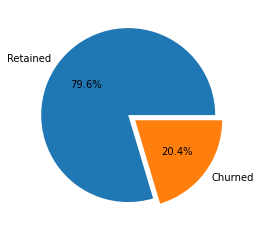

In [14]:
plt.pie([tot_retained/len(raw_data),tot_churned/len(raw_data)],labels = ['Retained','Churned'],autopct='%1.1f%%',explode =(0,0.1))
plt.show()

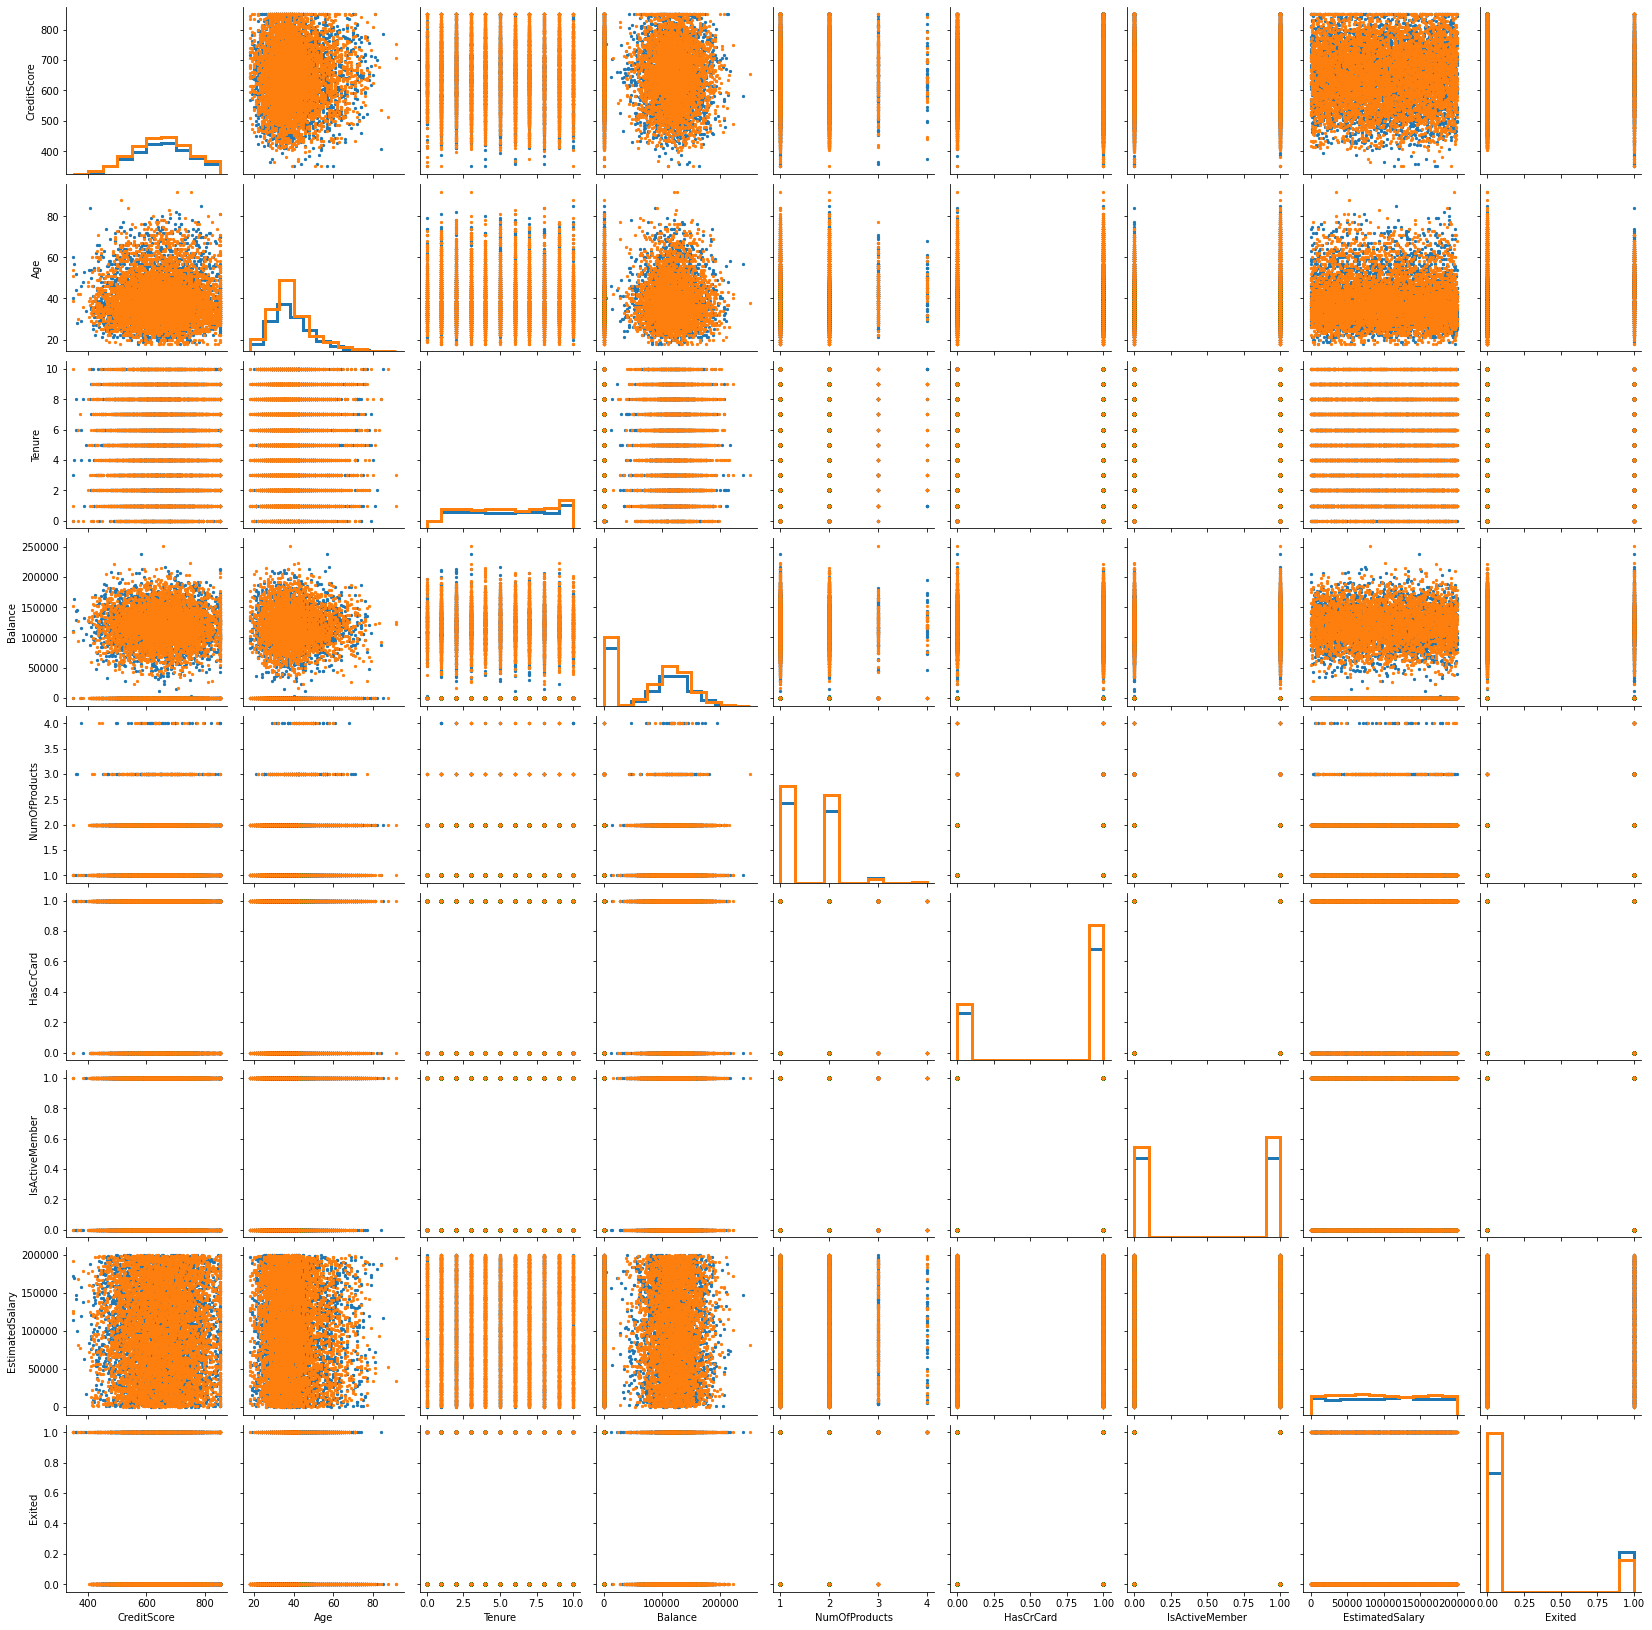

In [15]:
g = sns.PairGrid(raw_data,hue = 'Gender')
g = g.map_diag(plt.hist,histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter,s = 5)

In [16]:
# univariate analysis 

def univariate_continous_plots(df):
    
    cols = list(df.columns[df.dtypes != 'object'])
    df1 = df[cols]
    cmap = sns.color_palette("bright", len(cols)-1)
    
    fig,axs = plt.subplots(2,4,figsize = (20,10))
    plt.subplots_adjust(wspace = 0.4,hspace = 0.4)
    axs = axs.flatten()
    for i in range(len(cols[:-1])):
        sns.distplot(df1[cols[i]],bins =10,kde=True,ax = axs[i],color = cmap[i],label = cols[i],)
                
            

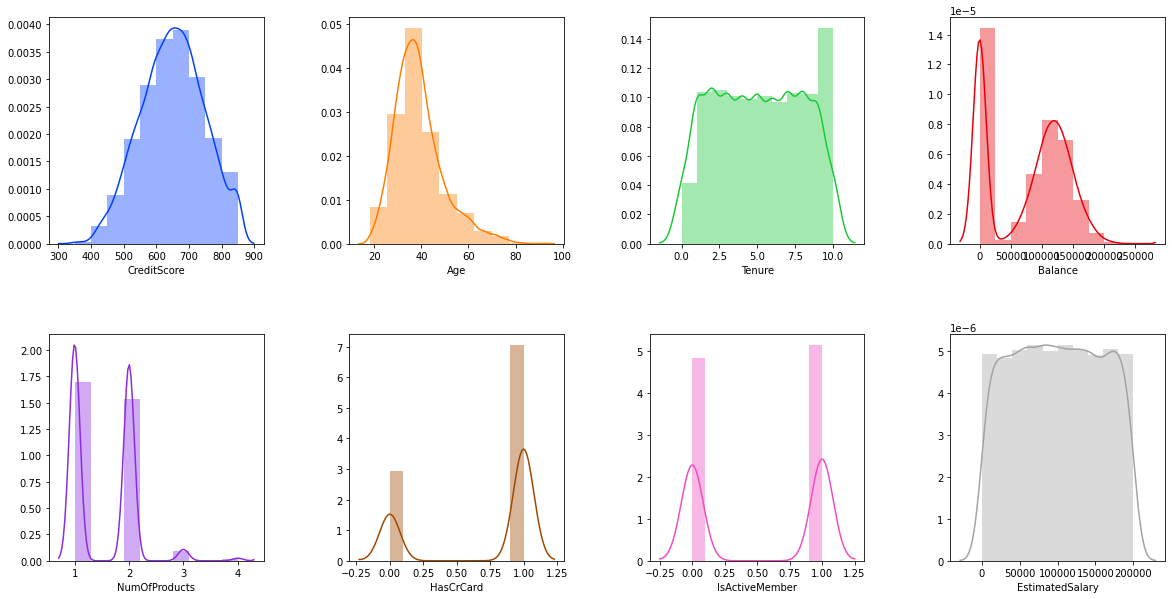

In [17]:
univariate_continous_plots(raw_data)

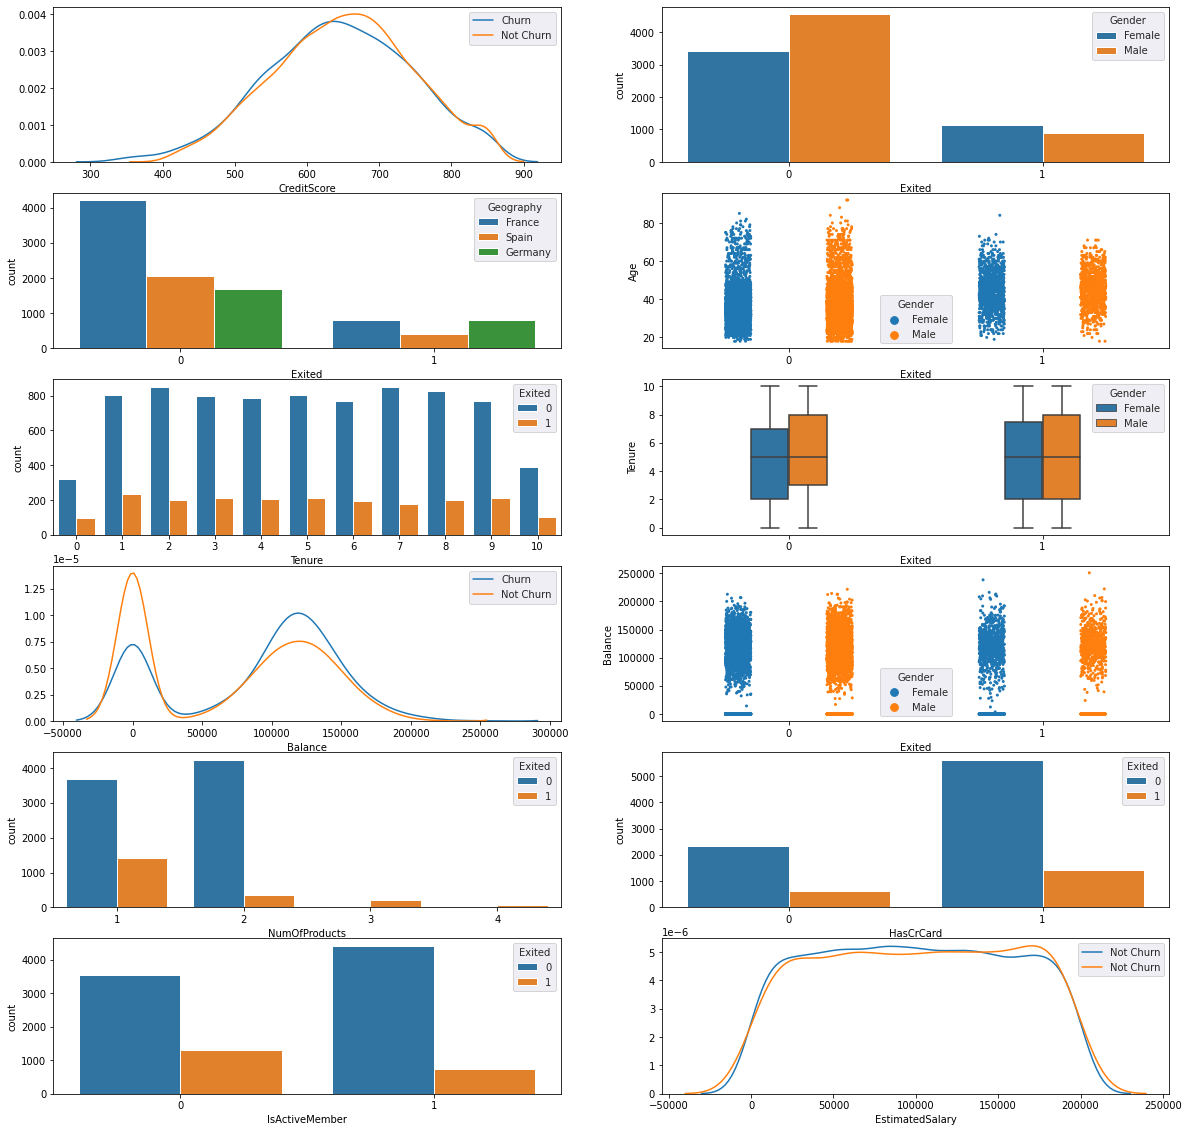

In [18]:
# bivariate analysis ... to check and observe how these variables influence the customers to churn

fig,axs = plt.subplots(6,2,figsize=(20,20))
axs = axs.flatten()
sns.set_style('darkgrid')
# check how the credit score is impacting the churn rate: 
sns.distplot(raw_data['CreditScore'][raw_data['Exited'] == 1],hist = False,label = 'Churn',ax = axs[0])
sns.distplot(raw_data['CreditScore'][raw_data['Exited'] == 0],hist = False,label = 'Not Churn',ax = axs[0])

# check how the gender is affecting the churn rate

sns.countplot(x= 'Exited',hue ='Gender',data = raw_data,ax = axs[1] )
sns.countplot(x= 'Exited',hue ='Geography',data = raw_data,ax = axs[2] )

sns.stripplot(x ='Exited',y='Age',hue = 'Gender',data = raw_data,ax = axs[3],dodge = True,s = 3)
sns.countplot(x= 'Tenure',hue ='Exited',data = raw_data,ax = axs[4] )
sns.boxplot(x ='Exited',y='Tenure',hue = 'Gender',data = raw_data,ax = axs[5],dodge = True,width=0.3)

sns.distplot(raw_data['Balance'][raw_data['Exited'] == 1],hist = False,label = 'Churn',ax = axs[6])
sns.distplot(raw_data['Balance'][raw_data['Exited'] == 0],hist = False,label = 'Not Churn',ax = axs[6])

sns.stripplot(x ='Exited',y='Balance',hue = 'Gender',data = raw_data,ax = axs[7],dodge = True,s = 3)
sns.countplot(x ='NumOfProducts',hue = 'Exited',data = raw_data,ax = axs[8],dodge = True)

sns.countplot(x ='HasCrCard',hue = 'Exited',data = raw_data,ax = axs[9],dodge = True)
sns.countplot(x ='IsActiveMember',hue = 'Exited',data = raw_data,ax = axs[10],dodge = True)

sns.distplot(raw_data['EstimatedSalary'][raw_data['Exited'] == 0],hist = False,label = 'Not Churn',ax = axs[11])
sns.distplot(raw_data['EstimatedSalary'][raw_data['Exited'] == 1],hist = False,label = 'Not Churn',ax = axs[11])


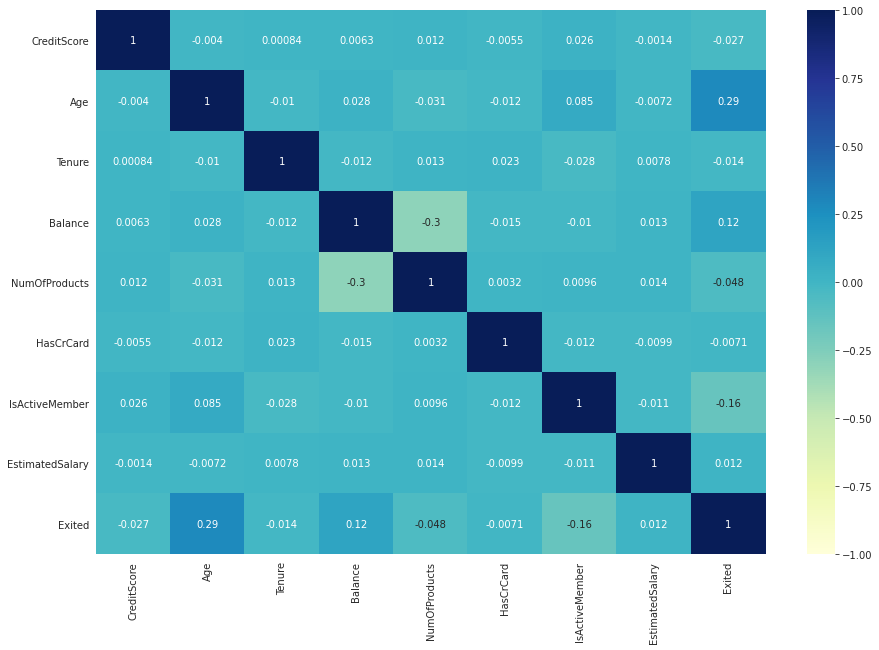

In [19]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(raw_data.corr(),cmap = 'YlGnBu',vmin = -1,vmax = 1,annot = True,)

From the univariate and bivariate analysis, the correlation heat map, we can deduce that the churn rate is mpre influenced by age, balance andd activemembers. 
However we can also observe that, people who are not an active members have churned more that non active members. Similarly customers using multiple products are less likely to churn. 

In [20]:
# convert categorical variables into numeric

cat_var1 = pd.get_dummies(raw_data[list(uniq_elements.keys())],drop_first = True)
cat_var2 = pd.get_dummies(raw_data['NumOfProducts'],drop_first = True,prefix='Products')

In [21]:
raw_data_1 = pd.concat((raw_data[raw_data.columns[:-1]],cat_var1,cat_var2),axis = 1)

In [22]:
raw_data_1.drop(['Geography','Gender','NumOfProducts'],inplace = True,axis = 1)

In [23]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [24]:
scaler = MinMaxScaler()
data_norm = pd.DataFrame(scaler.fit_transform(raw_data_1),columns = raw_data_1.columns)

In [25]:
data_norm.describe()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Products_2,Products_3,Products_4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.282727,0.501280,0.304848,0.70550,0.515100,0.500441,0.250900,0.247700,0.545700,0.459000,0.026600,0.006000
std,0.193307,0.141727,0.289217,0.248696,0.45584,0.499797,0.287580,0.433553,0.431698,0.497932,0.498341,0.160919,0.077231
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.189189,0.300000,0.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.604000,0.256757,0.500000,0.387402,1.00000,1.000000,0.500960,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.736000,0.351351,0.700000,0.508749,1.00000,1.000000,0.746955,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
Y = raw_data.Exited

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data_norm,Y,test_size = 0.40,random_state = 42,shuffle = True)

In [28]:
from sklearn.linear_model import LogisticRegression

Logit = LogisticRegression(penalty='l2',random_state = 0,solver = 'newton-cg')

In [29]:
lr = Logit.fit(X_train,Y_train)

In [30]:
Y_pred = lr.predict(X_test)

In [31]:
Y_test.value_counts()

0    3190
1     810
Name: Exited, dtype: int64

In [ ]:
pd.Series(Y_pred).value_counts()

0    3594
1     406
dtype: int64

In [98]:
from sklearn.metrics import confusion_matrix,plot_roc_curve,precision_recall_fscore_support,recall_score
confusion_matrix(Y_pred,Y_test)

array([[3076,  518],
       [ 114,  292]])

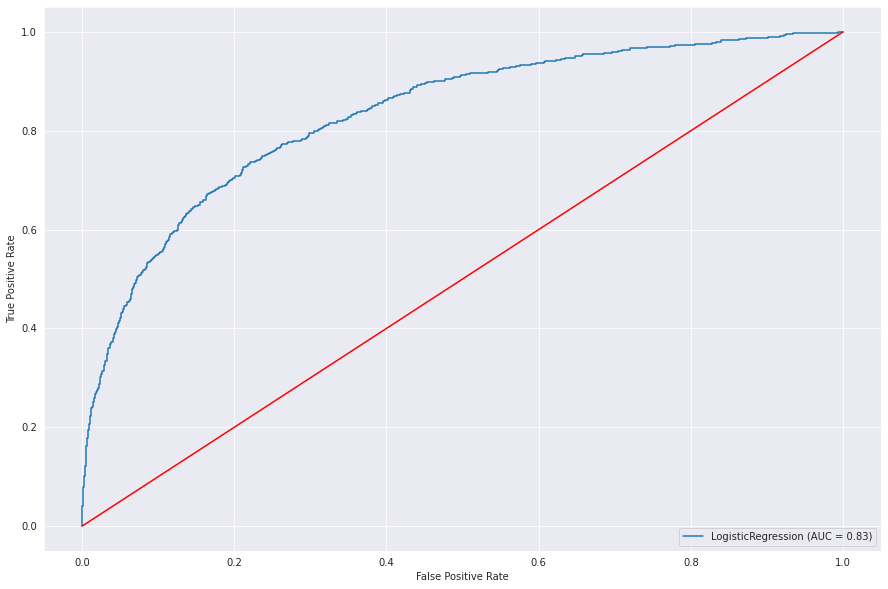

In [33]:
plot_roc_curve(lr,X_test,Y_test)
plt.plot([0,1],[0,1],color = 'r')
plt.show()

In [34]:
# now we try to analyse the attributes and try to get rid of some unwanted and redundant attributes
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,CreditScore,7.43
1,Age,4.35
6,EstimatedSalary,3.66
2,Tenure,3.60
3,Balance,3.20
4,HasCrCard,3.12
9,Gender_Male,2.14
10,Products_2,2.08
5,IsActiveMember,2.06
7,Geography_Germany,1.77


In [36]:
# now try to get rid of attributes with high VIF values 
raw_data_2 = raw_data_1
raw_data_2.drop('CreditScore',inplace = True,axis = 1)

In [37]:
data_norm_2 = pd.DataFrame(scaler.fit_transform(raw_data_2),columns = raw_data_2.columns)

In [38]:
X_train_2,X_test_2,Y_train_2,Y_test_2 = train_test_split(data_norm_2,Y,test_size = 0.20,random_state = 42,shuffle = True)

In [39]:
lr2 = Logit.fit(X_train_2,Y_train_2)

In [40]:
Y_pred_2 = lr2.predict(X_test_2)

In [41]:
confusion_matrix(Y_pred_2,Y_test_2)

array([[1546,  256],
       [  61,  137]])

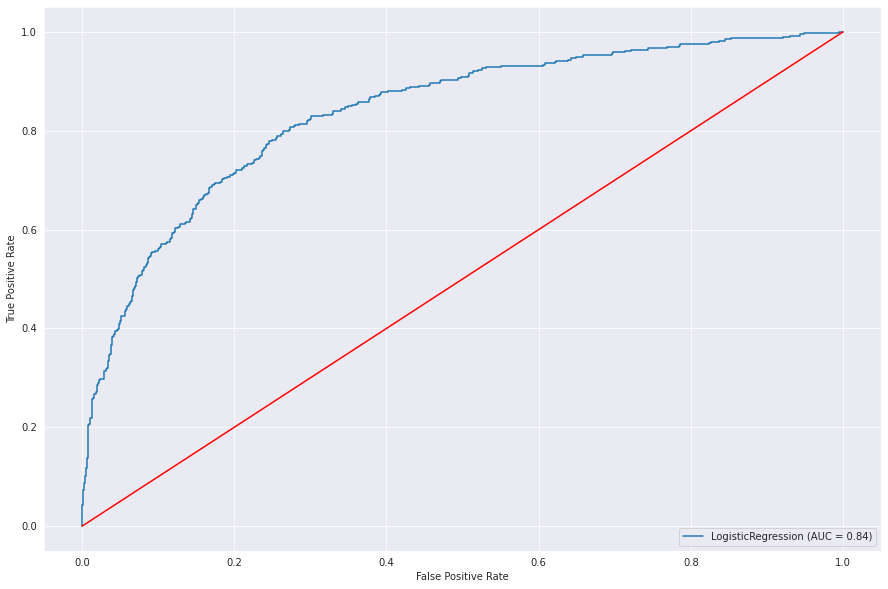

In [42]:

plot_roc_curve(lr2,X_test_2,Y_test_2)

plt.plot([0,1],[0,1],color = 'r')
plt.show()

In [43]:
raw_data_3 = raw_data_2.copy()

In [44]:
raw_data_3.drop(['Balance','EstimatedSalary','Tenure','HasCrCard'],inplace = True,axis = 1)

In [45]:
data_norm_3 = pd.DataFrame(scaler.fit_transform(raw_data_3),columns = raw_data_3.columns)

In [46]:
X_train_3,X_test_3,Y_train_3,Y_test_3 = train_test_split(data_norm_3,Y,test_size = 0.40,random_state = 42,shuffle = True)

In [47]:
lr3 = Logit.fit(X_train_3,Y_train_3)

In [48]:
Y_pred_3 = lr3.predict(X_test_3)

In [49]:
confusion_matrix(Y_pred_3,Y_test_3)

array([[3074,  522],
       [ 116,  288]])

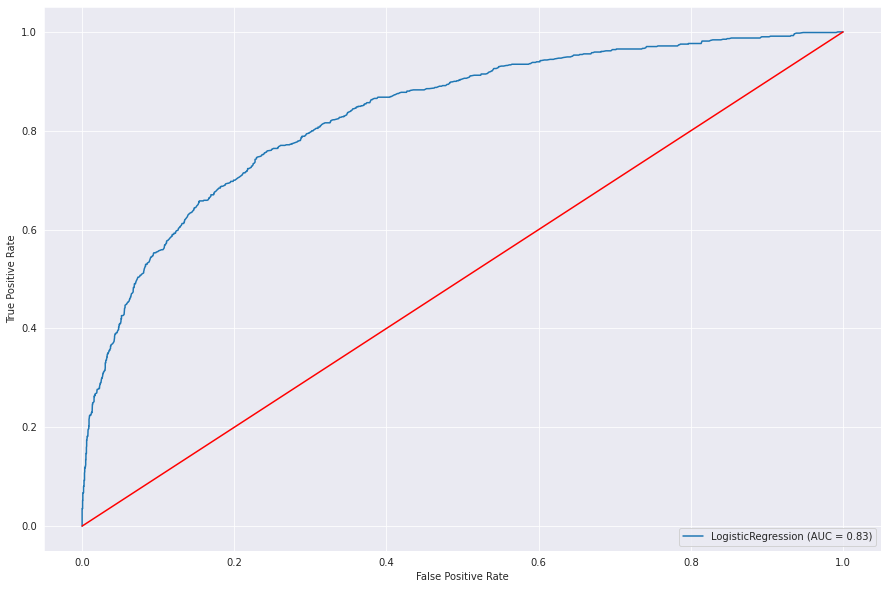

In [50]:
plot_roc_curve(lr3,X_test_3,Y_test_3)

plt.plot([0,1],[0,1],color = 'r')
plt.show()

In [51]:
lr3.score(X_test_3,Y_test_3)

0.8405

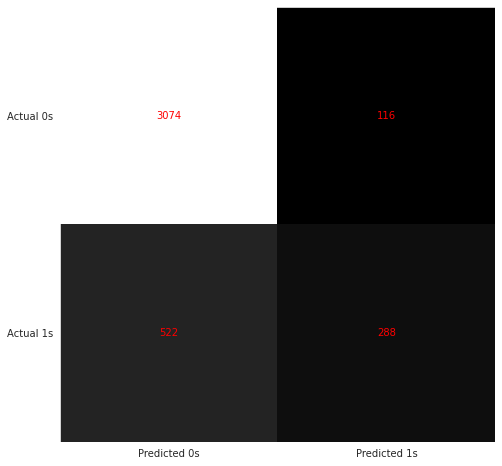

In [52]:
cm = confusion_matrix(Y_test_3,Y_pred_3)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm,cmap = 'gray')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [53]:
precision_recall_fscore_support(Y_test_3,Y_pred_3)

(array([0.85483871, 0.71287129]),
 array([0.96363636, 0.35555556]),
 array([0.90598291, 0.47446458]),
 array([3190,  810]))

In [54]:
raw_data_4 = raw_data_1
raw_data_4['Exited'] = raw_data['Exited']

In [149]:
subdataset_retain = raw_data_4[raw_data_4['Exited']==0].sample(1*raw_data_4['Exited'].value_counts()[1])
subdataset_churn = raw_data_4[raw_data_4['Exited']==1]

In [150]:
subdataset = pd.concat((subdataset_retain,subdataset_churn),axis = 0)

In [151]:
data_norm_4 = pd.DataFrame(scaler.fit_transform(subdataset),columns = raw_data_4.columns)


In [152]:
Y = data_norm_4.pop('Exited')

In [59]:
X_train_4,X_test_4,Y_train_4,Y_test_4 = train_test_split(data_norm_4,Y,test_size = 0.10,random_state = 42,shuffle = True)


In [60]:
lr4 = Logit.fit(X_train_4,Y_train_4)
Y_pred_4 = lr4.predict(X_test_4)
Y_train_pred = lr4.predict(X_train_4)

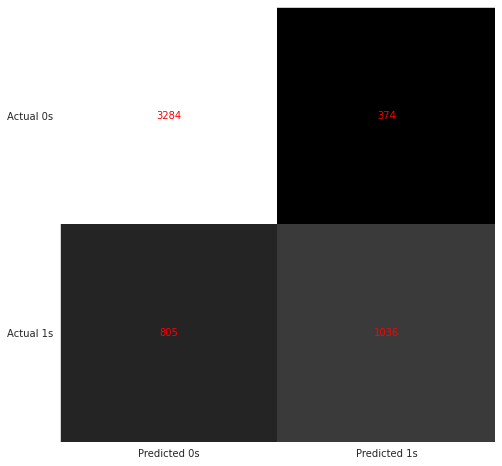

In [61]:
cm = confusion_matrix(Y_train_4,Y_train_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm,cmap = 'gray')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

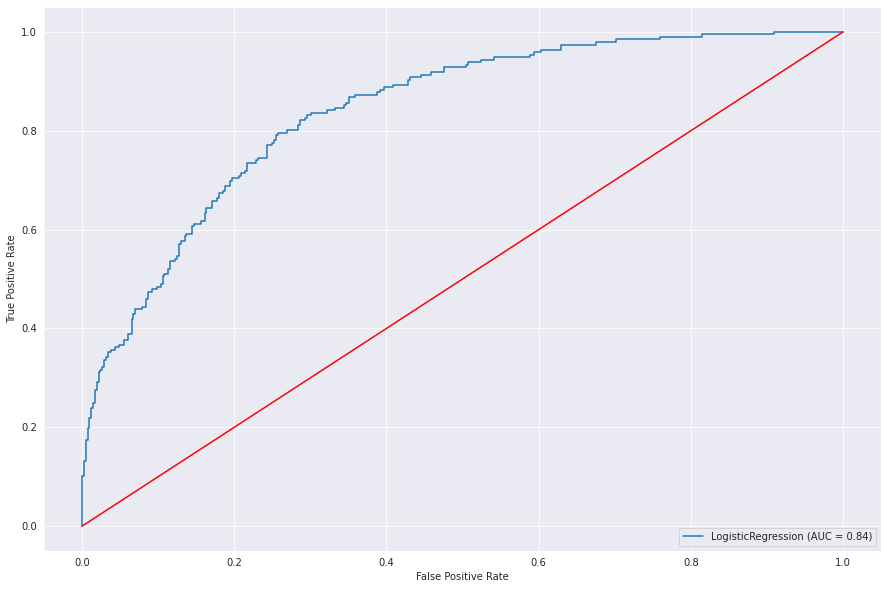

In [63]:
plot_roc_curve(lr4,X_test_4,Y_test_4)

plt.plot([0,1],[0,1],color = 'r')
plt.show()

In [76]:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.regularizers import l2
from keras.optimizers import Adam


In [177]:
Y_data = raw_data['Exited']

In [190]:
X_train,X_test,Y_train,Y_test = train_test_split(data_norm_2,Y_data,test_size = 0.20,random_state = 42,shuffle = True)

In [216]:
def logit_model(Xi):
  input_dim = Xi.shape[1]
  model = Sequential()
  model.add(Dense(10,input_dim = input_dim,activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros',kernel_regularizer=l2(l=0.01),bias_regularizer=l2(l=0.01)))
  model.add(Dense(10,activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros',kernel_regularizer=l2(l=0.01),bias_regularizer=l2(l=0.01)))
  model.add(Dense(50,activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros',kernel_regularizer=l2(l=0.01),bias_regularizer=l2(l=0.01)))
  model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform',bias_initializer='zeros',kernel_regularizer=l2(l=0.01),bias_regularizer=l2(l=0.01)))

  return model

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 1s 81us/step - loss: 1.1316 - accuracy: 0.2292 - val_loss: 1.0394 - val_accuracy: 0.4169
Epoch 2/50
6400/6400 [==============================] - 0s 50us/step - loss: 0.9692 - accuracy: 0.7391 - val_loss: 0.9027 - val_accuracy: 0.7987
Epoch 3/50
6400/6400 [==============================] - 0s 47us/step - loss: 0.8526 - accuracy: 0.7934 - val_loss: 0.8015 - val_accuracy: 0.7987
Epoch 4/50
6400/6400 [==============================] - 0s 52us/step - loss: 0.7714 - accuracy: 0.7934 - val_loss: 0.7401 - val_accuracy: 0.7987
Epoch 5/50
6400/6400 [==============================] - 0s 49us/step - loss: 0.7257 - accuracy: 0.7934 - val_loss: 0.7055 - val_accuracy: 0.7987
Epoch 6/50
6400/6400 [==============================] - 0s 51us/step - loss: 0.6963 - accuracy: 0.7934 - val_loss: 0.6797 - val_accuracy: 0.7987
Epoch 7/50
6400/6400 [==============================] - 0s 48us/step - loss: 0.672

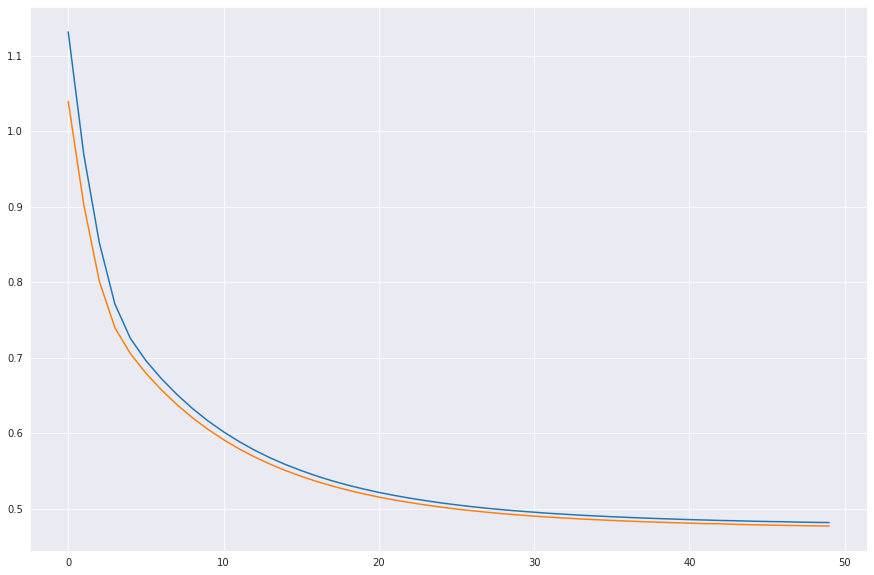

In [220]:
model = logit_model(X_train)
opt = Adam(learning_rate=0.0001)
model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics = ['accuracy'])
history = model.fit(X_train,Y_train,epochs = 50,batch_size = 32,validation_split=0.20)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [221]:
_,accuracy = model.evaluate(X_test,Y_test)
print('Accuracy :',(100*accuracy))

predictions = model.predict(X_test);
pred = [round(x[0]) for x in predictions] 

2000/2000 [==============================] - 0s 23us/step
Accuracy : 82.74999856948853


In [209]:
precision_recall_fscore_support(Y_test, pred,average = 'weighted',pos_label = None)

(0.8262247270657052, 0.8315, 0.7869443369917892, None)

In [222]:
confusion_matrix(Y_test,pred)

array([[1591,   16],
       [ 329,   64]])

In [223]:
tn, fp, fn, tp = confusion_matrix(Y_test,pred).ravel()
print('True Negatives:', tn)
print('False Negatives:', fn)
print('True Positives:', tp)
print('False Positives:', fp)




True Negatives: 1591
False Negatives: 329
True Positives: 64
False Positives: 16


In [197]:
recall_score(Y_test,pred)

0.19083969465648856

In [198]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

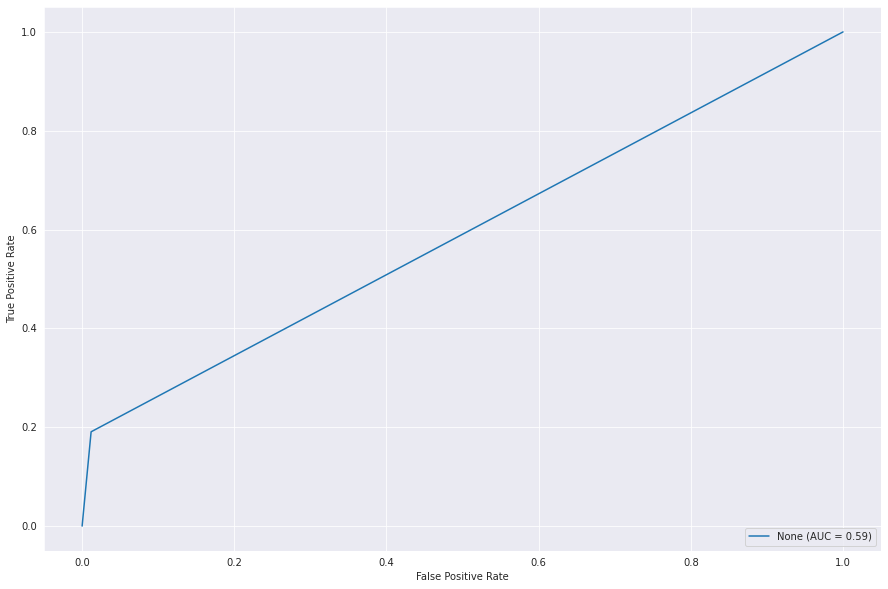

In [199]:
fpr,tpr,thresholds = roc_curve(Y_test,pred)
auc_score = auc(fpr,tpr)
disp = RocCurveDisplay(fpr,tpr,roc_auc=auc_score,estimator_name=None)
disp.plot()
plt.show()

In [ ]:
fpr_lr,tpr_lr,thresholds_lr = roc_curve(Y_test_4,Y_pred_4)
auc_score_lr = auc(fpr_lr,tpr_lr)


plt.plot([0, 1], [0, 1], 'r-')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_score))
plot_roc_curve(lr4,X_test_4,Y_test_4)
plt.show()

In [224]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.2+ MB
